In [1]:
from gensim.models import Word2Vec
import pandas as pd

In [18]:
df = pd.read_csv('../data/blog-gender-dataset_csv.csv')

In [19]:
from nltk.tokenize import TweetTokenizer

In [20]:
tt = TweetTokenizer()

In [23]:
df['Tokens'] = df.Blog.apply(lambda blog: tt.tokenize(str(blog)))

In [24]:
from string import punctuation

In [25]:
plist = set(list(punctuation))

In [26]:
df.Tokens = df.Tokens.apply(lambda tokens: [token for token in tokens if token not in plist])

In [90]:
model_sg = Word2Vec(df.Tokens, min_count=10, workers=4, sg=1)

In [91]:
print(model_sg)

Word2Vec(vocab=9840, size=100, alpha=0.025)


In [67]:
words = list(model_sg.wv.vocab)

In [69]:
word_vectors = model_sg[model_sg.wv.vocab]

/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=2)

In [72]:
results = pca.fit_transform(word_vectors)

In [73]:
from matplotlib import pyplot as plt

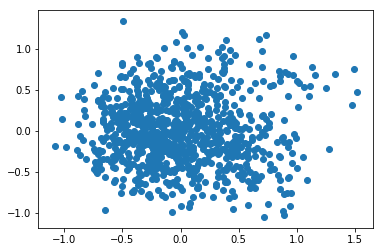

In [74]:
plt.scatter(results[:, 0], results[:, 1])

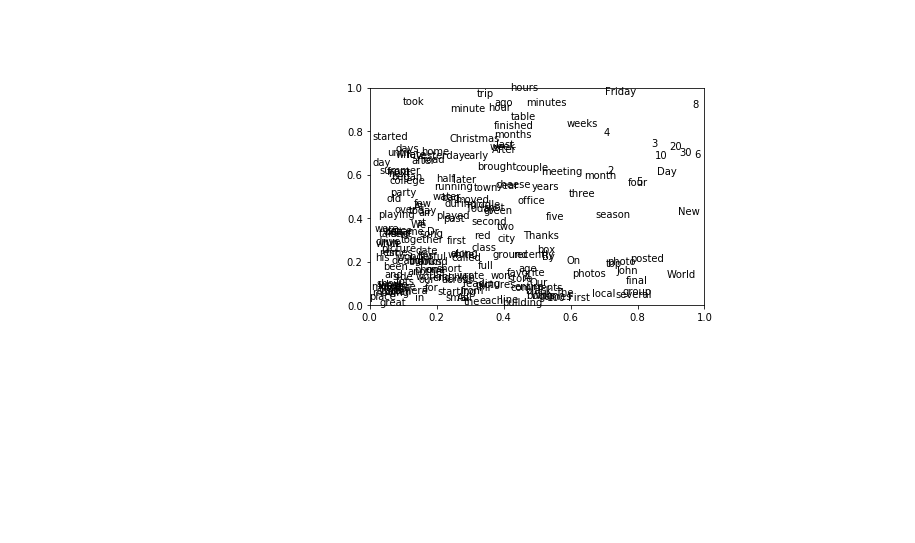

In [76]:
for i, word in enumerate(words):
    plt.annotate(word, xy=(results[i, 0], results[i, 1]))

In [79]:
tokensM = df[df.Gender == 'M'].Tokens.apply(lambda tokens: [token for token in tokens if token not in plist])
tokensF = df[df.Gender == 'F'].Tokens.apply(lambda tokens: [token for token in tokens if token not in plist])

In [80]:
modelsgm = Word2Vec(tokensM, min_count=155, workers=4, sg=1)
modelsgf = Word2Vec(tokensF, min_count=155, workers=4, sg=1)

In [81]:
wordsm = list(modelsgm.wv.vocab)
wordsf = list(modelsgf.wv.vocab)

In [83]:
word_vectors_m = modelsgm[modelsgm.wv.vocab]
word_vectors_f = modelsgf[modelsgf.wv.vocab]
pcam = PCA(n_components=2)
pcaf = PCA(n_components=2)
resultsm = pcam.fit_transform(word_vectors_m)
resultsf = pcaf.fit_transform(word_vectors_f)

/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [86]:
plt.rcParams['figure.figsize'] = [10, 10]

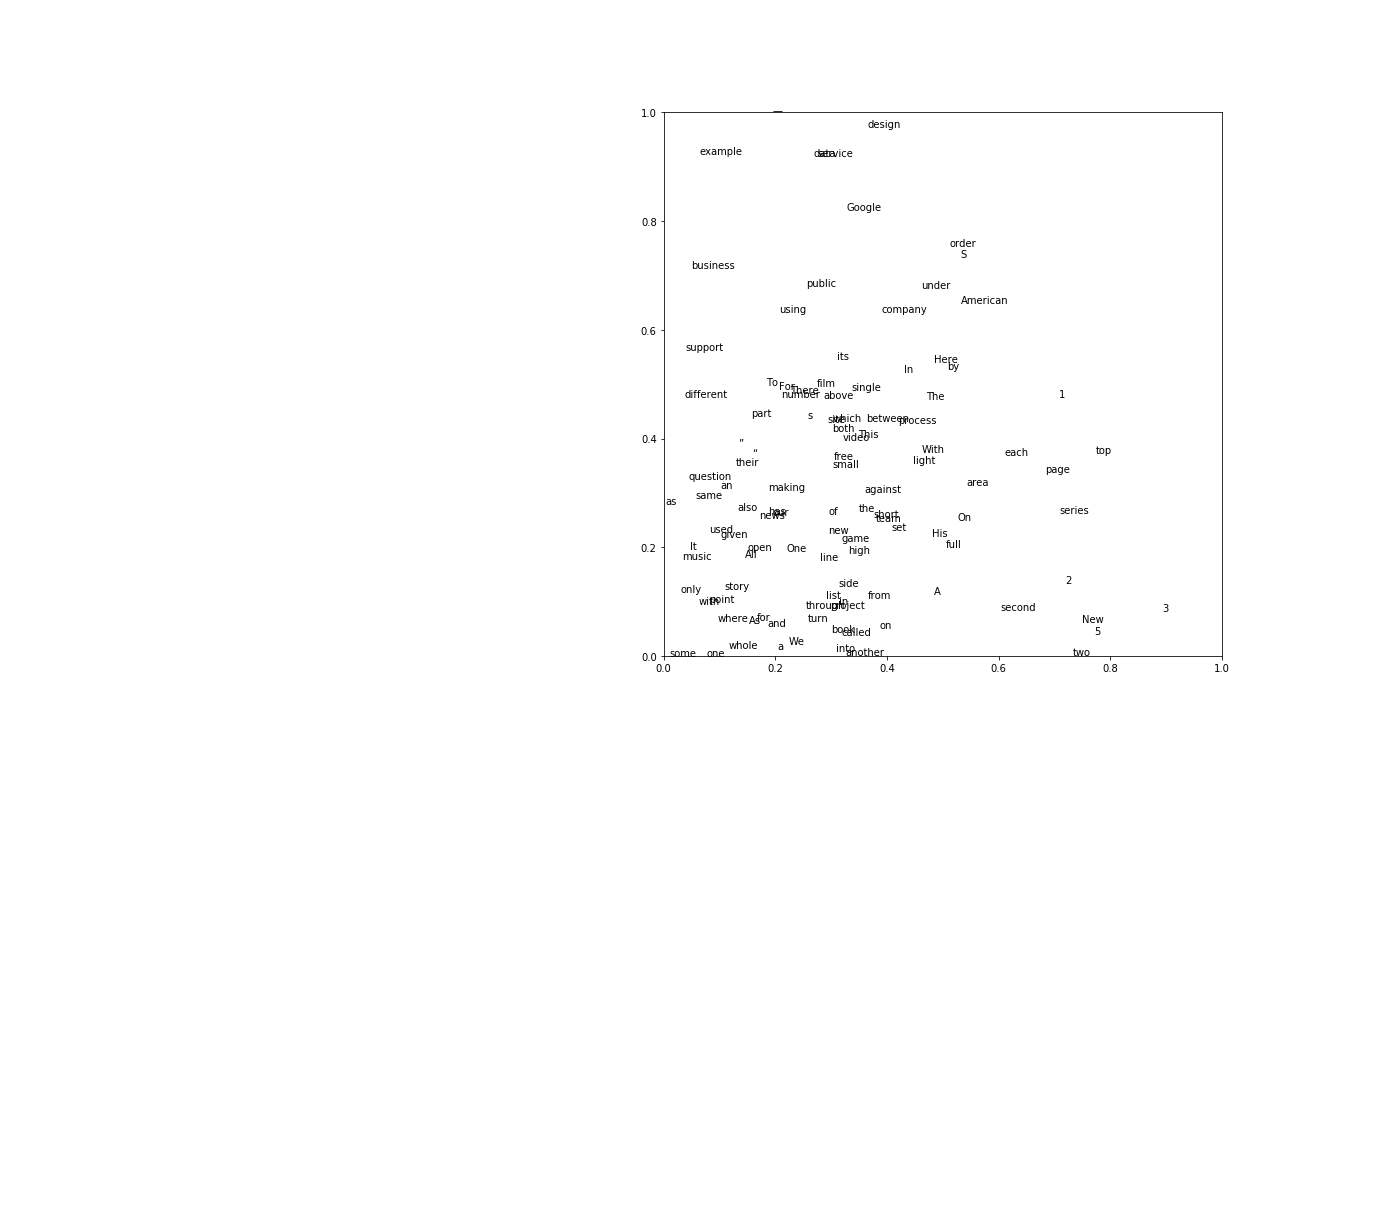

In [87]:
for i, word in enumerate(wordsm):
    plt.annotate(word, xy=(resultsm[i, 0], resultsm[i, 1]))

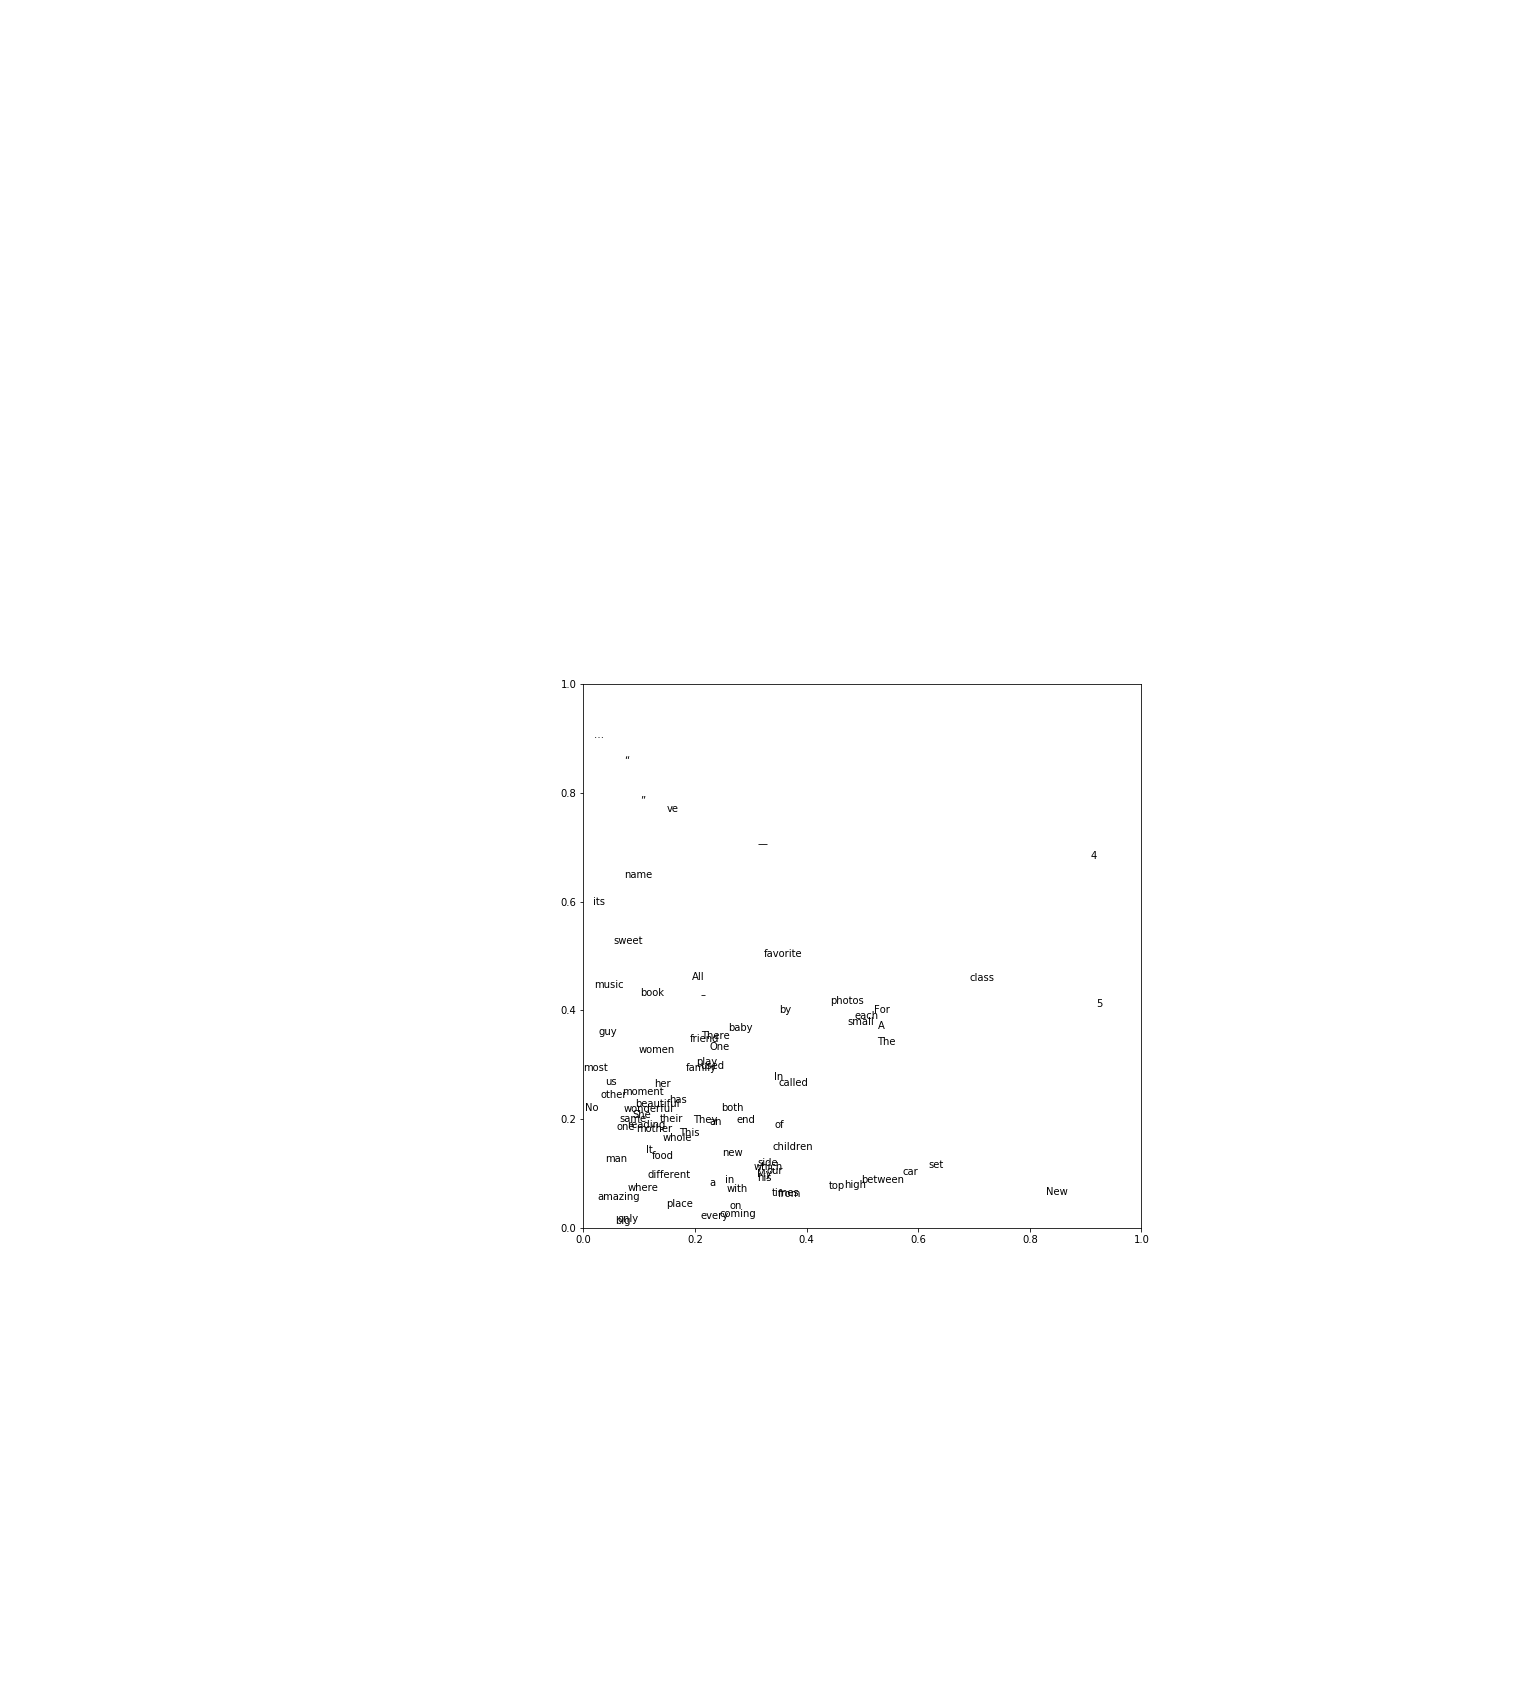

In [88]:
for i, word in enumerate(wordsf):
    plt.annotate(word, xy=(resultsf[i, 0], resultsf[i, 1]))

In [89]:
print(modelsgm)
print(modelsgf)

Word2Vec(vocab=484, size=100, alpha=0.025)
Word2Vec(vocab=438, size=100, alpha=0.025)


In [92]:
import numpy as np

In [93]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [94]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [95]:
w2v_feature_array = averaged_word_vectorizer(corpus=df.Tokens, model=model_sg, num_features=100)

/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [96]:
from sklearn.cluster import AffinityPropagation

In [100]:
ap = AffinityPropagation()
ap.fit(w2v_feature_array)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [101]:
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
df = pd.concat([df, cluster_labels], axis=1)

In [107]:
fClusters = df[df.Gender == 'F'].ClusterLabel
mClusters = df[df.Gender == 'M'].ClusterLabel

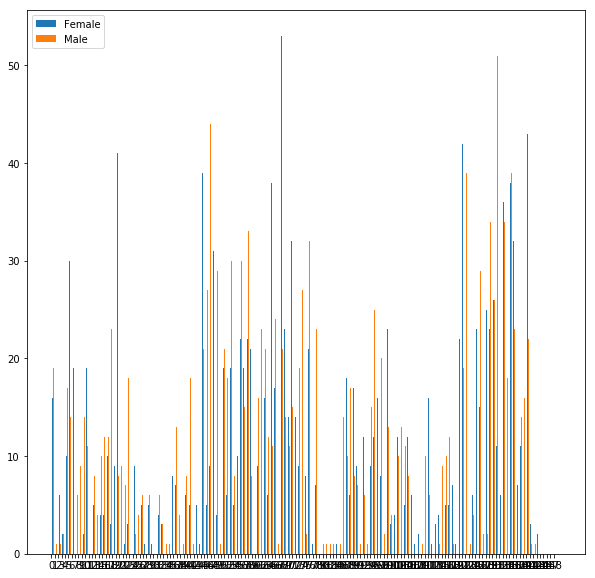

In [117]:
bins = np.linspace(0, 150, 150)
plt.hist([fClusters, mClusters], bins=bins, rwidth=0.5, label=['Female', 'Male'])
plt.legend(loc='upper left')
plt.xticks(range(149))
plt.show()

In [152]:
clusterVals = np.unique(df.ClusterLabel.values)

In [153]:
for cluster in clusterVals:
    print("Cluster", cluster)
    print("No. of males = ", df[(df.ClusterLabel == cluster) & (df.Gender == 'M')].values.shape[0])
    print("No. of females = ", df[(df.ClusterLabel == cluster) & (df.Gender == 'F')].values.shape[0])
    print("\n")

Cluster 0
No. of males =  15
No. of females =  9


Cluster 1
No. of males =  4
No. of females =  7


Cluster 2
No. of males =  1
No. of females =  0


Cluster 3
No. of males =  1
No. of females =  6


Cluster 4
No. of males =  2
No. of females =  2


Cluster 5
No. of males =  17
No. of females =  10


Cluster 6
No. of males =  14
No. of females =  30


Cluster 7
No. of males =  9
No. of females =  19


Cluster 8
No. of males =  6
No. of females =  0


Cluster 9
No. of males =  9
No. of females =  0


Cluster 10
No. of males =  14
No. of females =  2


Cluster 11
No. of males =  11
No. of females =  19


Cluster 12
No. of males =  9
No. of females =  0


Cluster 13
No. of males =  8
No. of females =  5


Cluster 14
No. of males =  4
No. of females =  16


Cluster 15
No. of males =  10
No. of females =  4


Cluster 16
No. of males =  12
No. of females =  4


Cluster 17
No. of males =  12
No. of females =  10


Cluster 18
No. of males =  23
No. of females =  3


Cluster 19
No. of males = 

In [132]:
from sklearn.cluster import KMeans

In [133]:
kMeans = KMeans(n_clusters=2, init='k-means++')

In [134]:
kMeans.fit(w2v_feature_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
cluster_labels = kMeans.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabelKMeans'])
df = pd.concat([df, cluster_labels], axis=1)

In [151]:
clusterVals = np.unique(df.ClusterLabelKMeans.values)
for cluster in clusterVals:
    print("Cluster", cluster)
    print("No. of males = ", df[(df.ClusterLabelKMeans == cluster) & (df.Gender == 'M')].values.shape[0])
    print("No. of females = ", df[(df.ClusterLabelKMeans == cluster) & (df.Gender == 'F')].values.shape[0])
    print("\n")

Cluster 0
No. of males =  962
No. of females =  535


Cluster 1
No. of males =  717
No. of females =  1013


